Here, we analayze different initialization techniques for our iris dataset. First, we import the necessary libraries and split the dataset into training and testing.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
pd.unique(df[['Species']].values.ravel())

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
target_encoded_values = {"Species": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}}
df = df.replace(target_encoded_values)
# df.head()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [12]:
unorganized = df.sample(frac=1, random_state=1)
unorganized.shape

(150, 5)

In [13]:
unorganized.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
56,6.3,3.3,4.7,1.6,1
141,6.9,3.1,5.1,2.3,2
44,5.1,3.8,1.9,0.4,0
29,4.7,3.2,1.6,0.2,0
120,6.9,3.2,5.7,2.3,2


In [14]:
train = unorganized.iloc[:int(0.7*len(unorganized)), :]
train.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
56,6.3,3.3,4.7,1.6,1
141,6.9,3.1,5.1,2.3,2
44,5.1,3.8,1.9,0.4,0
29,4.7,3.2,1.6,0.2,0
120,6.9,3.2,5.7,2.3,2


In [15]:
print(train.shape)

(105, 5)


In [16]:
test = unorganized.iloc[int(0.7*len(unorganized)): , :]
test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
26,5.0,3.4,1.6,0.4,0
76,6.8,2.8,4.8,1.4,1
43,5.0,3.5,1.6,0.6,0
24,4.8,3.4,1.9,0.2,0
136,6.3,3.4,5.6,2.4,2
121,5.6,2.8,4.9,2.0,2
143,6.8,3.2,5.9,2.3,2
49,5.0,3.3,1.4,0.2,0
21,5.1,3.7,1.5,0.4,0
70,5.9,3.2,4.8,1.8,1


In [17]:
print(test.shape)

(45, 5)


In [18]:
#for feature variables in training and testing dataset
X_train = train.iloc[:, :4]
X_test = test.iloc[:, :4]

#for target variables in training and testing dataset
y_train = train.iloc[:, 4:]
y_test = test.iloc[:, 4:]

In [19]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [20]:
def initialize_weights_and_bias(mode, distribution='normal'):
    if mode == 'random':
        W1 = np.random.random((3, 4)).astype(np.float32)
        b1 = np.random.random((1, 3)).astype(np.float32)
        W2 = np.random.random((3, 3)).astype(np.float32)
        b2 = np.random.random((1, 3)).astype(np.float32)
        W3 = np.random.random((3, 3)).astype(np.float32)
        b3 = np.random.random((1, 3)).astype(np.float32)
        W4 = np.random.random((3, 3)).astype(np.float32)
        b4 = np.random.random((1, 3)).astype(np.float32)
        W5 = np.random.random((3, 3)).astype(np.float32)
        b5 = np.random.random((1, 3)).astype(np.float32)
    elif mode == 'xavier':
        if distribution == 'normal':
            W1 = np.random.normal(loc=0.0, scale=np.sqrt(2/(4+3)), size=(3, 4)).astype(np.float32)
            b1 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(1, 3)).astype(np.float32)
            W2 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(3, 3)).astype(np.float32)
            b2 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(1, 3)).astype(np.float32)
            W3 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(3, 3)).astype(np.float32)
            b3 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(1, 3)).astype(np.float32)
            W4 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(3, 3)).astype(np.float32)
            b4 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(1, 3)).astype(np.float32)
            W5 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(3, 3)).astype(np.float32)
            b5 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(1, 3)).astype(np.float32)
        elif distribution == 'uniform':
            W1 = np.random.uniform(low = -np.sqrt(6/(4+3)), high = (6/np.sqrt(4+3)), size=(3, 4)).astype(np.float32)
            b1 = np.random.uniform(low = -np.sqrt(6/(3+3)), high = (6/np.sqrt(3+3)), size=(1, 3)).astype(np.float32)
            W2 = np.random.uniform(low = -np.sqrt(6/(3+3)), high = (6/np.sqrt(3+3)), size=(3, 3)).astype(np.float32)
            b2 = np.random.uniform(low = -np.sqrt(6/(3+3)), high = (6/np.sqrt(3+3)), size=(1, 3)).astype(np.float32)
            W3 = np.random.uniform(low = -np.sqrt(6/(4+3)), high = (6/np.sqrt(3+3)), size=(3, 3)).astype(np.float32)
            b3 = np.random.uniform(low = -np.sqrt(6/(3+3)), high = (6/np.sqrt(3+3)), size=(1, 3)).astype(np.float32)
            W4 = np.random.uniform(low = -np.sqrt(6/(3+3)), high = (6/np.sqrt(3+3)), size=(3, 3)).astype(np.float32)
            b4 = np.random.uniform(low = -np.sqrt(6/(3+3)), high = (6/np.sqrt(3+3)), size=(1, 3)).astype(np.float32)
            W5 = np.random.uniform(low = -np.sqrt(6/(3+3)), high = (6/np.sqrt(3+3)), size=(3, 3)).astype(np.float32)
            b5 = np.random.uniform(low = -np.sqrt(6/(3+3)), high = (6/np.sqrt(3+3)), size=(1, 3)).astype(np.float32)
    elif mode == 'constant':
        W1 = np.ones((3, 4))
        b1 = np.ones((1, 3))
        W2 = np.ones((3, 3))
        b2 = np.ones((1, 3))
        W3 = np.ones((3, 3))
        b3 = np.ones((1, 3))
        W4 = np.ones((3, 3))
        b4 = np.ones((1, 3))
        W5 = np.ones((3, 3))
        b5 = np.ones((1, 3))
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [21]:
#Activation Functions
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1)

def tanh(x):
    return np.tanh(x)

In [22]:
def forward_pass(x, W1, b1, W2, b2):
    
    #First layer
    x = np.array(x, dtype=np.float32)
    res1 = np.matmul(x, W1.T) + b1
    layer1_out = sigmoid(res1)
    # print(layer1_out)
    
    #Second layer
    res2 = np.matmul(layer1_out, W2.T) + b2
    layer2_out = softmax(res2)
    #print(layer2_out)
    return layer2_out.flatten(), layer1_out.flatten()

In [23]:
def forward_pass(x, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5):
    
    #First layer
    x = np.array(x, dtype=np.float32)
    res1 = np.matmul(x, W1.T) + b1
    layer1_out = sigmoid(res1)
    var_res1 = np.std(res1)**2
    var_layer1_out = np.std(layer1_out)**2
    print(f"Layer 1 = {res1} Sigmoid Act = {layer1_out}\nVariance Layer1 = {var_res1}\tVariance Sigmoid = {var_layer1_out}")
    
    #Second layer
    res2 = np.matmul(layer1_out, W2.T) + b2
    layer2_out = tanh(res2)
    var_res2 = np.std(res2)**2
    var_layer2_out = np.std(layer2_out)**2
    print(f"Layer 2 = {res2} TanH Act = {layer2_out}\nVariance Layer2 = {var_res2}\tVariance Sigmoid = {var_layer2_out}")
    
    #Third layer
    res3 = np.matmul(layer2_out, W3.T) + b3
    layer3_out = sigmoid(res3)
    var_res3 = np.std(res3)**2
    var_layer3_out = np.std(layer3_out)**2
    print(f"Layer 3 = {res3} Sigmoid Act = {layer3_out}\nVariance Layer3 = {var_res3}\tVariance Sigmoid = {var_layer3_out}")
    
    #Fourth Layer
    res4 = np.matmul(layer3_out, W4.T) + b4
    layer4_out = tanh(res4)
    var_res4 = np.std(res4)**2
    var_layer4_out = np.std(layer4_out)**2
    print(f"Layer 4 = {res4} Tanh Act = {layer4_out}\nVariance Layer4 = {var_res4}\tVariance Sigmoid = {var_layer4_out}")
    
    #Fifth Layer
    res5 = np.matmul(layer4_out, W5.T) + b5
    layer5_out = softmax(res5)
    var_res5 = np.std(res5)**2
    var_layer5_out = np.std(layer5_out)**2
    print(f"Layer 5 = {res5} Softmax Act = {layer5_out}\nVariance Layer5 = {var_res5}\tVariance Sigmoid = {var_layer5_out}")
    
    
    return res1, res2, res3, res4, res5, layer1_out.flatten(), layer2_out.flatten(), layer3_out.flatten(), layer4_out.flatten(), layer5_out.flatten()
    #return res1, res2, res3, res4, res5

In [24]:
def backward_pass(x, W1, b1, W2, b2, y_hat, y, z1, lr = 0.01):
    
    x = np.array(x, dtype= np.float32).reshape(1,4)
    y = np.array(y, dtype = np.float32).reshape(1,3)
    y_hat = np.array(y_hat, dtype=np.float32).reshape(1,3)
    z1 = np.array(z1, dtype=np.float32).reshape(1,3)
    
    res = y_hat - y                    
    dw2 = np.matmul(res.T, z1)                                                # 3x1 * 1x3 = 3x3
    db2 = res                                                                 
    grad_w1 = np.matmul(res, W2)          
    grad_w1 = np.matmul(grad_w1, z1.T)                                        # 1x3 * 3x1 = 1x1
    grad_w2 = 1 - z1                                                          # 1x3
    db1 = np.matmul(grad_w1, grad_w2)                                  
    dw1 = np.matmul(db1.T, x)                             
    
    up_W2 = W2 - lr*dw2
    up_b2 = b2 - lr*db2
    up_b1 = b1 - lr*db1
    up_W1 = W1 - lr*dw1
    
    return up_W2, up_b2, up_W1, up_b1
    

## Xavier Initialiazation with Uniform Distribution

Initialization and Passing our inputs from the different first layer.

Layer 1 = [[13.772343  -4.9782214 10.136034 ]] Sigmoid Act = [[0.9999989 0.0068392 0.9999604]]
Variance Layer1 = 65.91634075397542	Variance Sigmoid = 0.21918400197556398
Layer 2 = [[ 1.0163094  3.3090134 -0.5662402]] TanH Act = [[ 0.76835907  0.99733144 -0.51259273]]
Variance Layer2 = 2.530949357304749	Variance Sigmoid = 0.4414596506880031
Layer 3 = [[2.1381404  0.21389925 4.5129523 ]] Sigmoid Act = [[0.8945554  0.55327183 0.9891529 ]]
Variance Layer3 = 3.091587681300112	Variance Sigmoid = 0.035046164578037775
Layer 4 = [[ 1.7295865 -0.0747928  4.321389 ]] Tanh Act = [[ 0.93900704 -0.07465365  0.99964726]]
Variance Layer4 = 3.2555155189019302	Variance Sigmoid = 0.24281195024289914
Layer 5 = [[3.8311386  0.07641802 1.739709  ]] Softmax Act = [[0.87190235 0.02040861 0.10768903]]
Variance Layer5 = 2.3598380643352925	Variance Sigmoid = 0.14629792309330814


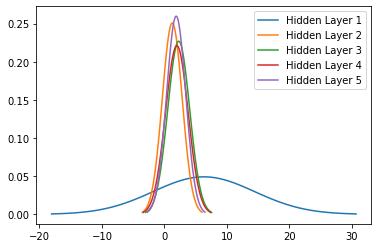

Layer 1 = [[13.84638   -3.7136955  7.843448 ]] Sigmoid Act = [[0.99999905 0.02380665 0.99960786]]
Variance Layer1 = 53.10654983143104	Variance Sigmoid = 0.21168218781157577
Layer 2 = [[ 1.0168633  3.3087    -0.5662018]] TanH Act = [[ 0.7685859  0.9973298 -0.5125644]]
Variance Layer2 = 2.5303861294653416	Variance Sigmoid = 0.44149450181727445
Layer 3 = [[2.1383007  0.21413505 4.513516  ]] Sigmoid Act = [[0.89457047 0.5533302  0.9891589 ]]
Variance Layer3 = 3.0920819487851645	Variance Sigmoid = 0.03503762337425109
Layer 4 = [[ 1.7295648  -0.07468206  4.321418  ]] Tanh Act = [[ 0.9390045  -0.07454352  0.9996473 ]]
Variance Layer4 = 3.2554109860575977	Variance Sigmoid = 0.24276034856559026
Layer 5 = [[3.8313813  0.07665531 1.7396169 ]] Softmax Act = [[0.8719339  0.02040924 0.10765687]]
Variance Layer5 = 2.3598765210574726	Variance Sigmoid = 0.1463139734154959


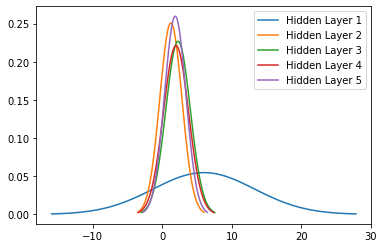

Layer 1 = [[17.579496 -5.053182  9.449441]] Sigmoid Act = [[1.         0.00634841 0.9999213 ]]
Variance Layer1 = 87.629125605622	Variance Sigmoid = 0.21939227974087405
Layer 2 = [[ 1.016253    3.3089685  -0.56625485]] TanH Act = [[ 0.76833594  0.9973312  -0.5126035 ]]
Variance Layer2 = 2.5309148412034688	Variance Sigmoid = 0.44146083877203424
Layer 3 = [[2.1381297 0.2138809 4.5128794]] Sigmoid Act = [[0.8945543 0.5532673 0.9891522]]
Variance Layer3 = 3.091506355236234	Variance Sigmoid = 0.03504680060741894
Layer 4 = [[ 1.729588   -0.07480145  4.321387  ]] Tanh Act = [[ 0.9390072  -0.07466225  0.99964726]]
Variance Layer4 = 3.2555236923226403	Variance Sigmoid = 0.24281597405320898
Layer 5 = [[3.8311198  0.07639942 1.7397162 ]] Softmax Act = [[0.8718999  0.02040855 0.10769155]]
Variance Layer5 = 2.3598351343121635	Variance Sigmoid = 0.14629671479502804


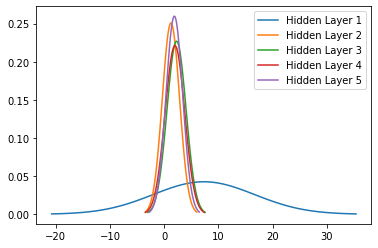

In [25]:
W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = initialize_weights_and_bias('xavier', distribution='uniform')
cost = 0
losses = []
epochs = 1
for j in range(epochs):
    losss = 0
    tp = 0
    for i in range(int(len(X_train)/30)):
        
        x = np.array(X_train.iloc[i:i+1, :], dtype=np.float32).reshape(1,4)
        target = np.array(y_train)
        y = []
        if target[i] == 0:
            y = [1, 0, 0]
        elif target[i] == 1:
            y = [0, 1, 0]
        elif target[i] == 2:
            y = [0, 0, 1]

        #network forward pass
        res1, res2, res3, res4, res5, layer1_out, layer2_out, layer3_out, layer4_out, y_hat = forward_pass(x, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
        
        #the true positives for this case, to calculate accuracy
        if np.argmax(y_hat) == np.argmax(y):
            tp += 1

        m1 = np.mean(res1)
        m2 = np.mean(res2)
        m3 = np.mean(res3)
        m4 = np.mean(res4)
        m5 = np.mean(res5)

        s1 = np.std(res1)
        s2 = np.std(res2)
        s3 = np.std(res3)
        s4 = np.std(res4)
        s5 = np.std(res5)
        
        

        x1 = np.linspace(m1-3*s1, m1+3*s1, 100)
        x2 = np.linspace(m2-3*s2, m2+3*s2, 100)
        x3 = np.linspace(m3-3*s3, m3+3*s3, 100)
        x4 = np.linspace(m4-3*s4, m4+3*s4, 100)
        x5 = np.linspace(m5-3*s5, m5+3*s5, 100)

        plt.plot(x1, norm.pdf(x1, m1, s1), label = 'Hidden Layer 1')
        plt.plot(x2, norm.pdf(x2, m2, s2), label = 'Hidden Layer 2')
        plt.plot(x3, norm.pdf(x3, m3, s3), label = 'Hidden Layer 3')
        plt.plot(x4, norm.pdf(x4, m4, s4), label = 'Hidden Layer 4')
        plt.plot(x5, norm.pdf(x5, m5, s5), label = 'Hidden Layer 5')
        plt.legend(loc='upper right')
        plt.show()

In [26]:
print(f"Accuracy for training data: {round(tp/len(X_train), 2)*100}%")

Accuracy for training data: 1.0%


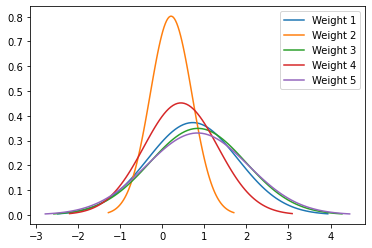

In [27]:
m1 = np.mean(W1)
m2 = np.mean(W2)
m3 = np.mean(W3)
m4 = np.mean(W4)
m5 = np.mean(W5)

s1 = np.std(W1)
s2 = np.std(W2)
s3 = np.std(W3)
s4 = np.std(W4)
s5 = np.std(W5)

x1 = np.linspace(m1-3*s1, m1+3*s1, 100)
x2 = np.linspace(m2-3*s2, m2+3*s2, 100)
x3 = np.linspace(m3-3*s3, m3+3*s3, 100)
x4 = np.linspace(m4-3*s4, m4+3*s4, 100)
x5 = np.linspace(m5-3*s5, m5+3*s5, 100)

plt.plot(x1, norm.pdf(x1, m1, s1), label = 'Weight 1')
plt.plot(x2, norm.pdf(x2, m2, s2), label = 'Weight 2')
plt.plot(x3, norm.pdf(x3, m3, s3), label = 'Weight 3')
plt.plot(x4, norm.pdf(x4, m4, s4), label = 'Weight 4')
plt.plot(x5, norm.pdf(x5, m5, s5), label = 'Weight 5')
plt.legend(loc='upper right')
plt.show()

## Xavier Initialization with Normal Distribution

Layer 1 = [[-6.8712053  4.1202273 -2.1440163]] Sigmoid Act = [[0.00103615 0.98401874 0.10489171]]
Variance Layer1 = 20.26651719120855	Variance Sigmoid = 0.19443391179618263
Layer 2 = [[ 2.4386852  -0.5161527   0.64039326]] TanH Act = [[ 0.9848811  -0.4747252   0.56516725]]
Variance Layer2 = 1.4780575767941997	Variance Sigmoid = 0.3764429532434974
Layer 3 = [[ 0.5719193   0.08772764 -0.10161355]] Sigmoid Act = [[0.639206   0.5219178  0.47461846]]
Variance Layer3 = 0.08043758264194256	Variance Sigmoid = 0.004786977112065438
Layer 4 = [[ 1.3264744  0.3058687 -1.4626747]] Tanh Act = [[ 0.868385    0.29667404 -0.8981708 ]]
Variance Layer4 = 1.3276373255440035	Variance Sigmoid = 0.5416919661635156
Layer 5 = [[ 0.24470796 -0.8790153  -2.522706  ]] Softmax Act = [[0.7205174  0.23421659 0.04526597]]
Variance Layer5 = 1.2914504425839937	Variance Sigmoid = 0.08090615364386711


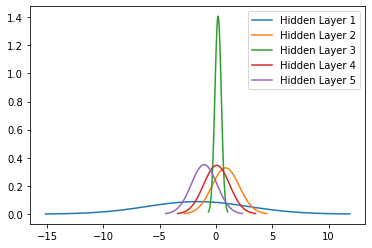

Layer 1 = [[-6.6843615  4.4143147 -2.4886556]] Sigmoid Act = [[0.00124875 0.9880419  0.07665731]]
Variance Layer1 = 20.937286177288343	Variance Sigmoid = 0.20111876197157486
Layer 2 = [[ 2.4356797 -0.5323165  0.6384517]] TanH Act = [[ 0.9847907  -0.48714983  0.56384444]]
Variance Layer2 = 1.4899697307130424	Variance Sigmoid = 0.383154897250634
Layer 3 = [[ 0.5813036   0.08795226 -0.09644186]] Sigmoid Act = [[0.6413673  0.5219739  0.47590825]]
Variance Layer3 = 0.08185951977233064	Variance Sigmoid = 0.004861503847300108
Layer 4 = [[ 1.3281621  0.307356  -1.462117 ]] Tanh Act = [[ 0.86879945  0.29802984 -0.89806294]]
Variance Layer4 = 1.3287484988814526	Variance Sigmoid = 0.5420242798236927
Layer 5 = [[ 0.24446301 -0.87902355 -2.5238407 ]] Softmax Act = [[0.7205065  0.23426852 0.04522504]]
Variance Layer5 = 1.2923501321211575	Variance Sigmoid = 0.08090776427707169


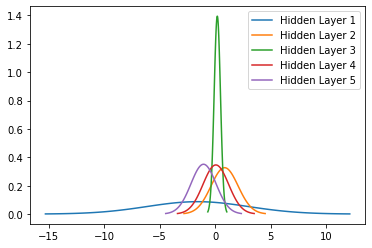

Layer 1 = [[-8.823925   5.9086385 -3.7736526]] Sigmoid Act = [[1.4714793e-04 9.9729151e-01 2.2452332e-02]]
Variance Layer1 = 37.366715908648075	Variance Sigmoid = 0.21612285362737627
Layer 2 = [[ 2.431428   -0.56251043  0.6353483 ]] TanH Act = [[ 0.98466176 -0.5098377   0.56172395]]
Variance Layer2 = 1.513825994138429	Variance Sigmoid = 0.3956277383809379
Layer 3 = [[ 0.59861577  0.08829045 -0.08690271]] Sigmoid Act = [[0.64533955 0.5220583  0.478288  ]]
Variance Layer3 = 0.08456221641594741	Variance Sigmoid = 0.005002258733505238
Layer 4 = [[ 1.3312628   0.31008577 -1.4610912 ]] Tanh Act = [[ 0.8695576   0.30051512 -0.89786434]]
Variance Layer4 = 1.3307901576772565	Variance Sigmoid = 0.5426337130167127
Layer 5 = [[ 0.2440136  -0.87903893 -2.525918  ]] Softmax Act = [[0.72048616 0.2343636  0.0451502 ]]
Variance Layer5 = 1.293997754880266	Variance Sigmoid = 0.08091061259398202


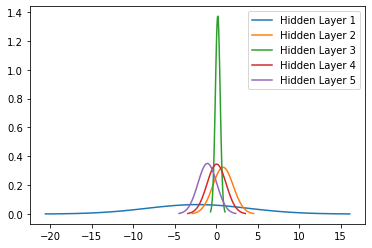

In [28]:
W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = initialize_weights_and_bias('xavier', distribution='normal')
cost = 0
losses = []
epochs = 1
for j in range(epochs):
    losss = 0
    tp = 0
    for i in range(int(len(X_train)/30)):
        
        x = np.array(X_train.iloc[i:i+1, :], dtype=np.float32).reshape(1,4)
        target = np.array(y_train)
        y = []
        if target[i] == 0:
            y = [1, 0, 0]
        elif target[i] == 1:
            y = [0, 1, 0]
        elif target[i] == 2:
            y = [0, 0, 1]

        #network forward pass
        res1, res2, res3, res4, res5, layer1_out, layer2_out, layer3_out, layer4_out, y_hat = forward_pass(x, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
        
        #the true positives for this case, to calculate accuracy
        if np.argmax(y_hat) == np.argmax(y):
            tp += 1

        m1 = np.mean(res1)
        m2 = np.mean(res2)
        m3 = np.mean(res3)
        m4 = np.mean(res4)
        m5 = np.mean(res5)

        s1 = np.std(res1)
        s2 = np.std(res2)
        s3 = np.std(res3)
        s4 = np.std(res4)
        s5 = np.std(res5)

        x1 = np.linspace(m1-3*s1, m1+3*s1, 100)
        x2 = np.linspace(m2-3*s2, m2+3*s2, 100)
        x3 = np.linspace(m3-3*s3, m3+3*s3, 100)
        x4 = np.linspace(m4-3*s4, m4+3*s4, 100)
        x5 = np.linspace(m5-3*s5, m5+3*s5, 100)

        plt.plot(x1, norm.pdf(x1, m1, s1), label = 'Hidden Layer 1')
        plt.plot(x2, norm.pdf(x2, m2, s2), label = 'Hidden Layer 2')
        plt.plot(x3, norm.pdf(x3, m3, s3), label = 'Hidden Layer 3')
        plt.plot(x4, norm.pdf(x4, m4, s4), label = 'Hidden Layer 4')
        plt.plot(x5, norm.pdf(x5, m5, s5), label = 'Hidden Layer 5')
        plt.legend(loc='upper right')
        plt.show()


In [29]:
print(f"Accuracy for training data: {round(tp/len(X_train), 2)*100}%")

Accuracy for training data: 1.0%


Calculating the mean of every weight, taking standard deviation and plotting a PDF of 1000 points on it based on mean and standard deviation

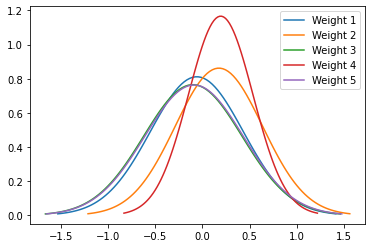

In [30]:
m1 = np.mean(W1)
m2 = np.mean(W2)
m3 = np.mean(W3)
m4 = np.mean(W4)
m5 = np.mean(W5)

s1 = np.std(W1)
s2 = np.std(W2)
s3 = np.std(W3)
s4 = np.std(W4)
s5 = np.std(W5)

x1 = np.linspace(m1-3*s1, m1+3*s1, 100)
x2 = np.linspace(m2-3*s2, m2+3*s2, 100)
x3 = np.linspace(m3-3*s3, m3+3*s3, 100)
x4 = np.linspace(m4-3*s4, m4+3*s4, 100)
x5 = np.linspace(m5-3*s5, m5+3*s5, 100)

plt.plot(x1, norm.pdf(x1, m1, s1), label = 'Weight 1')
plt.plot(x2, norm.pdf(x2, m2, s2), label = 'Weight 2')
plt.plot(x3, norm.pdf(x3, m3, s3), label = 'Weight 3')
plt.plot(x4, norm.pdf(x4, m4, s4), label = 'Weight 4')
plt.plot(x5, norm.pdf(x5, m5, s5), label = 'Weight 5')
plt.legend(loc='upper right')
plt.show()

## Random Initialization

Layer 1 = [[4.027332  5.803304  7.9345374]] Sigmoid Act = [[0.98249024 0.9969915  0.999642  ]]
Variance Layer1 = 2.5513876419911554	Variance Sigmoid = 5.683282632671185e-05
Layer 2 = [[2.2159429  2.1289794  0.55846906]] TanH Act = [[0.97649544 0.9720926  0.50684065]]
Variance Layer2 = 0.5801428132144792	Variance Sigmoid = 0.04856160133680043
Layer 3 = [[1.1607047 1.9626303 2.0986013]] Sigmoid Act = [[0.7614608  0.87681735 0.89076716]]
Variance Layer3 = 0.17124696649520743	Variance Sigmoid = 0.003357985899633667
Layer 4 = [[2.1361542 1.4416343 2.0088608]] Tanh Act = [[0.9724847 0.8940262 0.9646483]]
Variance Layer4 = 0.09114526514031329	Variance Sigmoid = 0.0012449581245367464
Layer 5 = [[2.3729444 1.5150471 2.2090049]] Softmax Act = [[0.43997696 0.18657348 0.37344953]]
Variance Layer5 = 0.13827125802429752	Variance Sigmoid = 0.011506877384137637


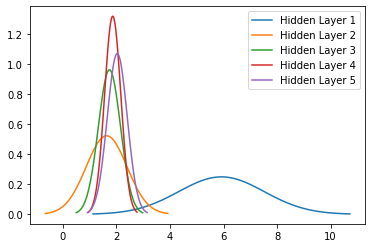

Layer 1 = [[4.0383177 4.807469  7.154066 ]] Sigmoid Act = [[0.98267823 0.9918977  0.99921894]]
Variance Layer1 = 1.7562222368726452	Variance Sigmoid = 4.57993424708271e-05
Layer 2 = [[2.212523   2.1282668  0.55756205]] TanH Act = [[0.976336   0.97205335 0.50616634]]
Variance Layer2 = 0.5792341878201093	Variance Sigmoid = 0.04868095256108007
Layer 3 = [[1.1601791 1.9623146 2.0982165]] Sigmoid Act = [[0.76136523 0.87678325 0.89072967]]
Variance Layer3 = 0.17131167045442286	Variance Sigmoid = 0.0033612196009563805
Layer 4 = [[2.1360762 1.4415542 2.0087876]] Tanh Act = [[0.9724805 0.8940102 0.9646432]]
Variance Layer4 = 0.09114632683693813	Variance Sigmoid = 0.0012453367091803808
Layer 5 = [[2.3729224 1.5150331 2.2089868]] Softmax Act = [[0.43997568 0.18657443 0.3734499 ]]
Variance Layer5 = 0.1382689529889456	Variance Sigmoid = 0.01150670155539052


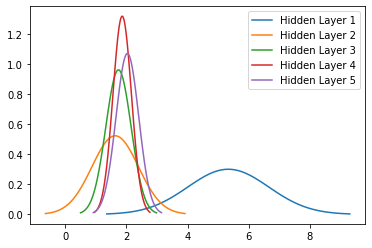

Layer 1 = [[5.1176248 6.058427  8.921589 ]] Sigmoid Act = [[0.9940454 0.9976674 0.9998665]]
Variance Layer1 = 2.616994110943679	Variance Sigmoid = 5.760028486883099e-06
Layer 2 = [[2.220762   2.135419   0.56231093]] TanH Act = [[0.97671825 0.9724448  0.50969005]]
Variance Layer2 = 0.581379144805684	Variance Sigmoid = 0.04803061159797317
Layer 3 = [[1.1627369 1.9640145 2.0998302]] Sigmoid Act = [[0.7618296 0.8769668 0.8908867]]
Variance Layer3 = 0.170959511087454	Variance Sigmoid = 0.0033451187979594565
Layer 4 = [[2.1364455 1.4419472 2.009137 ]] Tanh Act = [[0.97250056 0.89408904 0.96466744]]
Variance Layer4 = 0.09113770747861683	Variance Sigmoid = 0.0012434483023971432
Layer 5 = [[2.3730292 1.5151016 2.2090755]] Softmax Act = [[0.43998182 0.18656984 0.37344834]]
Variance Layer5 = 0.13828005723013348	Variance Sigmoid = 0.011507545545628217


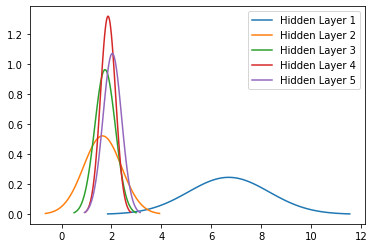

In [31]:
W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = initialize_weights_and_bias('random')

losses = []
epochs = 1
for j in range(epochs):
    losss = 0
    tp = 0
    for i in range(int(len(X_train)/30)):
        
        x = np.array(X_train.iloc[i:i+1, :], dtype=np.float32).reshape(1,4)
        target = np.array(y_train)
        y = []
        if target[i] == 0:
            y = [1, 0, 0]
        elif target[i] == 1:
            y = [0, 1, 0]
        elif target[i] == 2:
            y = [0, 0, 1]

        #network forward pass
        res1, res2, res3, res4, res5, layer1_out, layer2_out, layer3_out, layer4_out, y_hat = forward_pass(x, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
        
        #the true positives for this case, to calculate accuracy
        if np.argmax(y_hat) == np.argmax(y):
            tp += 1

        m1 = np.mean(res1)
        m2 = np.mean(res2)
        m3 = np.mean(res3)
        m4 = np.mean(res4)
        m5 = np.mean(res5)

        s1 = np.std(res1)
        s2 = np.std(res2)
        s3 = np.std(res3)
        s4 = np.std(res4)
        s5 = np.std(res5)

        x1 = np.linspace(m1-3*s1, m1+3*s1, 100)
        x2 = np.linspace(m2-3*s2, m2+3*s2, 100)
        x3 = np.linspace(m3-3*s3, m3+3*s3, 100)
        x4 = np.linspace(m4-3*s4, m4+3*s4, 100)
        x5 = np.linspace(m5-3*s5, m5+3*s5, 100)

        plt.plot(x1, norm.pdf(x1, m1, s1), label = 'Hidden Layer 1')
        plt.plot(x2, norm.pdf(x2, m2, s2), label = 'Hidden Layer 2')
        plt.plot(x3, norm.pdf(x3, m3, s3), label = 'Hidden Layer 3')
        plt.plot(x4, norm.pdf(x4, m4, s4), label = 'Hidden Layer 4')
        plt.plot(x5, norm.pdf(x5, m5, s5), label = 'Hidden Layer 5')
        plt.legend(loc='upper right')
        plt.show()

In [32]:
print(f"Accuracy for training data: {round(tp/len(X_train), 2)*100}%")

Accuracy for training data: 1.0%


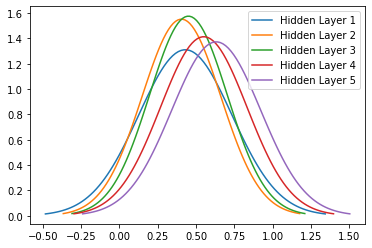

In [33]:
m1 = np.mean(W1)
m2 = np.mean(W2)
m3 = np.mean(W3)
m4 = np.mean(W4)
m5 = np.mean(W5)

s1 = np.std(W1)
s2 = np.std(W2)
s3 = np.std(W3)
s4 = np.std(W4)
s5 = np.std(W5)

x1 = np.linspace(m1-3*s1, m1+3*s1, 100)
x2 = np.linspace(m2-3*s2, m2+3*s2, 100)
x3 = np.linspace(m3-3*s3, m3+3*s3, 100)
x4 = np.linspace(m4-3*s4, m4+3*s4, 100)
x5 = np.linspace(m5-3*s5, m5+3*s5, 100)

plt.plot(x1, norm.pdf(x1, m1, s1), label = 'Hidden Layer 1')
plt.plot(x2, norm.pdf(x2, m2, s2), label = 'Hidden Layer 2')
plt.plot(x3, norm.pdf(x3, m3, s3), label = 'Hidden Layer 3')
plt.plot(x4, norm.pdf(x4, m4, s4), label = 'Hidden Layer 4')
plt.plot(x5, norm.pdf(x5, m5, s5), label = 'Hidden Layer 5')
plt.legend(loc='upper right')
plt.show()

## For constant uniform initialization

Layer 1 = [[12.20000024 12.20000024 12.20000024]] Sigmoid Act = [[0.99999497 0.99999497 0.99999497]]
Variance Layer1 = 0.0	Variance Sigmoid = 0.0
Layer 2 = [[3.99998491 3.99998491 3.99998491]] TanH Act = [[0.99932928 0.99932928 0.99932928]]
Variance Layer2 = 1.9721522630525295e-31	Variance Sigmoid = 0.0
Layer 3 = [[3.99798784 3.99798784 3.99798784]] Sigmoid Act = [[0.98197822 0.98197822 0.98197822]]
Variance Layer3 = 1.9721522630525295e-31	Variance Sigmoid = 1.232595164407831e-32
Layer 4 = [[3.94593465 3.94593465 3.94593465]] Tanh Act = [[0.99925274 0.99925274 0.99925274]]
Variance Layer4 = 1.9721522630525295e-31	Variance Sigmoid = 1.232595164407831e-32
Layer 5 = [[3.99775822 3.99775822 3.99775822]] Softmax Act = [[0.33333333 0.33333333 0.33333333]]
Variance Layer5 = 0.0	Variance Sigmoid = 0.0


c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


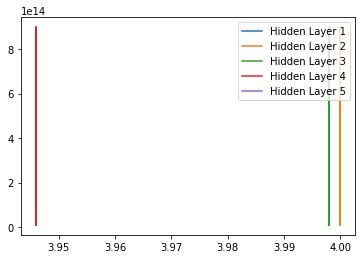

Layer 1 = [[12.69999993 12.69999993 12.69999993]] Sigmoid Act = [[0.99999695 0.99999695 0.99999695]]
Variance Layer1 = 0.0	Variance Sigmoid = 0.0
Layer 2 = [[3.99999085 3.99999085 3.99999085]] TanH Act = [[0.99932929 0.99932929 0.99932929]]
Variance Layer2 = 0.0	Variance Sigmoid = 0.0
Layer 3 = [[3.99798786 3.99798786 3.99798786]] Sigmoid Act = [[0.98197822 0.98197822 0.98197822]]
Variance Layer3 = 1.9721522630525295e-31	Variance Sigmoid = 0.0
Layer 4 = [[3.94593465 3.94593465 3.94593465]] Tanh Act = [[0.99925274 0.99925274 0.99925274]]
Variance Layer4 = 0.0	Variance Sigmoid = 0.0
Layer 5 = [[3.99775822 3.99775822 3.99775822]] Softmax Act = [[0.33333333 0.33333333 0.33333333]]
Variance Layer5 = 0.0	Variance Sigmoid = 0.0


c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


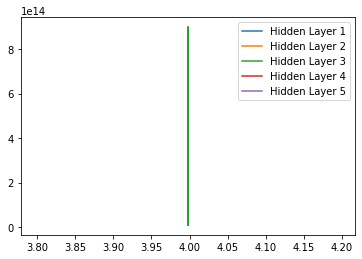

c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Layer 1 = [[16.39999998 16.39999998 16.39999998]] Sigmoid Act = [[0.99999992 0.99999992 0.99999992]]
Variance Layer1 = 0.0	Variance Sigmoid = 0.0
Layer 2 = [[3.99999977 3.99999977 3.99999977]] TanH Act = [[0.9993293 0.9993293 0.9993293]]
Variance Layer2 = 0.0	Variance Sigmoid = 0.0
Layer 3 = [[3.9979879 3.9979879 3.9979879]] Sigmoid Act = [[0.98197822 0.98197822 0.98197822]]
Variance Layer3 = 0.0	Variance Sigmoid = 0.0
Layer 4 = [[3.94593465 3.94593465 3.94593465]] Tanh Act = [[0.99925274 0.99925274 0.99925274]]
Variance Layer4 = 0.0	Variance Sigmoid = 0.0
Layer 5 = [[3.99775822 3.99775822 3.99775822]] Softmax Act = [[0.33333333 0.33333333 0.33333333]]
Variance Layer5 = 1.9721522630525295e-31	Variance Sigmoid = 0.0


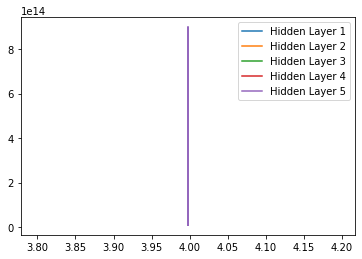

In [34]:
W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = initialize_weights_and_bias('constant')
cost = 0
losses = []
epochs = 1
for j in range(epochs):
    losss = 0
    tp = 0
    for i in range(int(len(X_train)/30)):
        
        x = np.array(X_train.iloc[i:i+1, :], dtype=np.float32).reshape(1,4)
        target = np.array(y_train)
        y = []
        if target[i] == 0:
            y = [1, 0, 0]
        elif target[i] == 1:
            y = [0, 1, 0]
        elif target[i] == 2:
            y = [0, 0, 1]

        #network forward pass
        res1, res2, res3, res4, res5, layer1_out, layer2_out, layer3_out, layer4_out, y_hat = forward_pass(x, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
        
        #the true positives for this case, to calculate accuracy
        if np.argmax(y_hat) == np.argmax(y):
            tp += 1

        m1 = np.mean(res1)
        m2 = np.mean(res2)
        m3 = np.mean(res3)
        m4 = np.mean(res4)
        m5 = np.mean(res5)

        s1 = np.std(res1)
        s2 = np.std(res2)
        s3 = np.std(res3)
        s4 = np.std(res4)
        s5 = np.std(res5)

        x1 = np.linspace(m1-3*s1, m1+3*s1, 100)
        x2 = np.linspace(m2-3*s2, m2+3*s2, 100)
        x3 = np.linspace(m3-3*s3, m3+3*s3, 100)
        x4 = np.linspace(m4-3*s4, m4+3*s4, 100)
        x5 = np.linspace(m5-3*s5, m5+3*s5, 100)

        plt.plot(x1, norm.pdf(x1, m1, s1), label = 'Hidden Layer 1')
        plt.plot(x2, norm.pdf(x2, m2, s2), label = 'Hidden Layer 2')
        plt.plot(x3, norm.pdf(x3, m3, s3), label = 'Hidden Layer 3')
        plt.plot(x4, norm.pdf(x4, m4, s4), label = 'Hidden Layer 4')
        plt.plot(x5, norm.pdf(x5, m5, s5), label = 'Hidden Layer 5')
        plt.legend(loc='upper right')
        plt.show()

In [35]:
print(f"Accuracy for training data: {round(tp/len(X_train), 2)*100}%")

Accuracy for training data: 1.0%


c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\saumy\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarnin

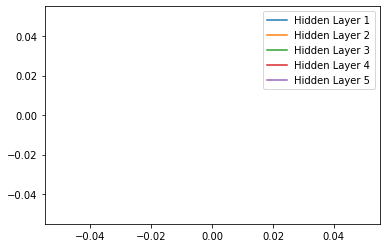

In [36]:
m1 = np.mean(W1)
m2 = np.mean(W2)
m3 = np.mean(W3)
m4 = np.mean(W4)
m5 = np.mean(W5)

s1 = np.std(W1)
s2 = np.std(W2)
s3 = np.std(W3)
s4 = np.std(W4)
s5 = np.std(W5)

x1 = np.linspace(m1-3*s1, m1+3*s1, 100)
x2 = np.linspace(m2-3*s2, m2+3*s2, 100)
x3 = np.linspace(m3-3*s3, m3+3*s3, 100)
x4 = np.linspace(m4-3*s4, m4+3*s4, 100)
x5 = np.linspace(m5-3*s5, m5+3*s5, 100)

plt.plot(x1, norm.pdf(x1, m1, s1), label = 'Hidden Layer 1')
plt.plot(x2, norm.pdf(x2, m2, s2), label = 'Hidden Layer 2')
plt.plot(x3, norm.pdf(x3, m3, s3), label = 'Hidden Layer 3')
plt.plot(x4, norm.pdf(x4, m4, s4), label = 'Hidden Layer 4')
plt.plot(x5, norm.pdf(x5, m5, s5), label = 'Hidden Layer 5')
plt.legend(loc='upper right')
plt.show()

In [37]:
tp_test = 0

for i in range(int(len(X_test)/10)):
    x = X_test.iloc[i:i+1, :].to_numpy()
    target = y_test.to_numpy()
    y = []
    if target[i] == 0:
        y = [1, 0, 0]
    elif target[i] == 1:
        y = [0, 1, 0]
    elif target[i] == 2:
        y = [0, 0, 1]


    #network forward pas
    layer1_out, layer2_out, layer3_out, layer4_out, y_hat = forward_pass(x, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
    
    print(f"{np.argmax(y_hat)} \ {np.argmax(y)}")
    
    if np.argmax(y_hat) == np.argmax(y):
        tp_test += 1
        

Layer 1 = [[11.40000013 11.40000013 11.40000013]] Sigmoid Act = [[0.9999888 0.9999888 0.9999888]]
Variance Layer1 = 0.0	Variance Sigmoid = 0.0
Layer 2 = [[3.99996641 3.99996641 3.99996641]] TanH Act = [[0.99932925 0.99932925 0.99932925]]
Variance Layer2 = 0.0	Variance Sigmoid = 0.0
Layer 3 = [[3.99798776 3.99798776 3.99798776]] Sigmoid Act = [[0.98197821 0.98197821 0.98197821]]
Variance Layer3 = 1.9721522630525295e-31	Variance Sigmoid = 0.0
Layer 4 = [[3.94593464 3.94593464 3.94593464]] Tanh Act = [[0.99925274 0.99925274 0.99925274]]
Variance Layer4 = 0.0	Variance Sigmoid = 1.232595164407831e-32
Layer 5 = [[3.99775822 3.99775822 3.99775822]] Softmax Act = [[0.33333333 0.33333333 0.33333333]]
Variance Layer5 = 0.0	Variance Sigmoid = 0.0


ValueError: too many values to unpack (expected 5)

In [ ]:
print(f"Accuracy for test data: {round(tp_test/len(X_test), 2)*100}%")

2.799999952316284 => 0.6613576412200928 => 0.3333333432674408


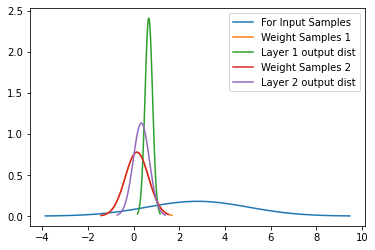

In [38]:
x = np.array(X_train.iloc[0:1, :], dtype=np.float32).reshape(1,4)
W1_a = np.random.normal(loc=0.0, scale=np.sqrt(2/7), size=(3, 4)).astype(np.float32)
W2_a = np.random.normal(loc=0.0, scale=np.sqrt(2/6), size=(3, 3)).astype(np.float32)
b1_a = np.random.normal(loc=0.0, scale=np.sqrt(2/6), size=(1, 3)).astype(np.float32)
b2_a = np.random.normal(loc=0.0, scale=np.sqrt(2/6), size=(1, 3)).astype(np.float32)




r1 = np.matmul(x, W1_a.T) + b1_a
layer1_out = sigmoid(r1)
r2 = np.matmul(layer1_out, W2_a.T) + b2_a
layer2_out = softmax(r2)

print(f"{np.mean(x)} => {np.mean(layer1_out)} => {np.mean(layer2_out)}")
s1_w1 = np.std(W1_a)
m1_w1 = np.mean(W1_a)
s_l1 = np.std(layer1_out)
m_l1 = np.mean(layer1_out)
s2_w2 = np.std(W2_a)
m2_w2 = np.mean(W2_a)
s_l2 = np.std(layer2_out)
m_l2 = np.mean(layer2_out)

s3 = np.std(x)
m3 = np.mean(x)

x_w1 = np.linspace(m1_w1-3*s1_w1, m1_w1+3*s1_w1, 100)
x_l1 = np.linspace(m_l1-3*s_l1, m_l1+3*s_l1, 100)
x_l2 = np.linspace(m_l2-3*s_l2, m_l2+3*s_l2, 100)
x_w2 = np.linspace(m2_w2-3*s2_w2, m2_w2+3*s2_w2, 100)
x_i = np.linspace(m3-3*s3, m3+3*s3, 100)
x_n = np.linspace(0-3*1, 0+3*1, 100)
# plt.plot(x_a, norm.pdf(x_n, 0, 1), label = 'Normal Distribution Curve')
plt.plot(x_i, norm.pdf(x_i, m3, s3), label = 'For Input Samples')
plt.plot(x_w1, norm.pdf(x_w1, m1_w1, s1_w1), label = 'Weight Samples 1')
plt.plot(x_l1, norm.pdf(x_l1, m_l1, s_l1), label = 'Layer 1 output dist')
plt.plot(x_w2, norm.pdf(x_w2, m1_w1, s1_w1), label = 'Weight Samples 2')
plt.plot(x_l2, norm.pdf(x_l2, m_l2, s_l2), label = 'Layer 2 output dist')
plt.legend(loc='upper right')
plt.show()

Weight =  [[-1.0708925   0.48247242 -0.22346279  0.7140005 ]
 [ 0.47323763 -0.07282891 -0.8467937  -1.5148473 ]
 [-0.44651496  0.8563988   0.21409374 -1.2457387 ]]
Weight * Input =  [[-4.406642   1.1343409  0.8435733]]
Mean Before transformation = 2.799999952316284, Mean after transformation = -0.8095759749412537


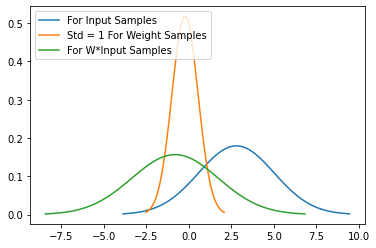

In [39]:
W1_a = np.random.normal(loc=0.0, scale=np.sqrt(1), size=(3, 4)).astype(np.float32)
x = np.array(X_train.iloc[0:1, :], dtype=np.float32).reshape(1,4)


r = np.matmul(x, W1_a.T)
print("Weight = ", W1_a)
print("Weight * Input = ", r)
s1 = np.std(W1_a)
m1 = np.mean(W1_a)
print(f"Mean Before transformation = {np.mean(x)}, Mean after transformation = {np.mean(r)}")
s2 = np.std(r)
m2 = np.mean(r)
s3 = np.std(x)
m3 = np.mean(x)

x_a = np.linspace(m1-3*s1, m1+3*s1, 100)
x_b = np.linspace(m2-3*s2, m2+3*s2, 100)
x_i = np.linspace(m3-3*s3, m3+3*s3, 100)
x_n = np.linspace(0-3*1, 0+3*1, 100)
# plt.plot(x_a, norm.pdf(x_n, 0, 1), label = 'Normal Distribution Curve')
plt.plot(x_i, norm.pdf(x_i, m3, s3), label = 'For Input Samples')
plt.plot(x_a, norm.pdf(x_a, m1, s1), label = 'Std = 1 For Weight Samples')
plt.plot(x_b, norm.pdf(x_b, m2, s2), label = 'For W*Input Samples')
plt.legend(loc='upper left')
plt.show()

Weight =  [[ 0.00382679  0.00851439 -0.01953067  0.00339688]
 [ 0.00128624 -0.02525631  0.00790606  0.0123917 ]
 [ 0.02393228  0.02328596 -0.03044248 -0.0207232 ]]
Weight * Input =  [[ 0.03349554 -0.08159944  0.19127542]]
Mean Before transformation = 2.799999952316284, Mean after transformation = 0.04772384092211723


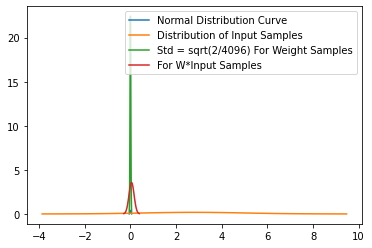

In [40]:
W1_a = np.random.normal(loc=0.0, scale=np.sqrt(2/4096), size=(3, 4)).astype(np.float32)
x = np.array(X_train.iloc[0:1, :], dtype=np.float32).reshape(1,4)

r = np.matmul(x, W1_a.T)
print("Weight = ", W1_a)
print("Weight * Input = ", r)
s1 = np.std(W1_a)
m1 = np.mean(W1_a)

s2 = np.std(r)
m2 = np.mean(r)
print(f"Mean Before transformation = {np.mean(x)}, Mean after transformation = {np.mean(r)}")
s3 = np.std(x)
m3 = np.mean(x)

x_a = np.linspace(m1-3*s1, m1+3*s1, 100)
x_b = np.linspace(m2-3*s2, m2+3*s2, 100)
x_i = np.linspace(m3-3*s3, m3+3*s3, 100)
x_n = np.linspace(0-3*1, 0+3*1, 100)
plt.plot(x_a, norm.pdf(x_n, 0, 1), label = 'Normal Distribution Curve')
plt.plot(x_i, norm.pdf(x_i, m3, s3), label = 'Distribution of Input Samples')
plt.plot(x_a, norm.pdf(x_a, m1, s1), label = 'Std = sqrt(2/4096) For Weight Samples')
plt.plot(x_b, norm.pdf(x_b, m2, s2), label = 'For W*Input Samples')
plt.legend(loc='upper right')
plt.show()

Weight =  [[ 2.5751762  2.5689297  2.5752385 19.263657 ]
 [ 2.8544526  5.6778283  4.770009   3.2569563]
 [-1.5763463  3.794846  -3.864126  -1.184093 ]]
Weight * Input =  [[32.154762  45.64254    1.1628051]]
Mean Before transformation = 2.799999952316284, Mean after transformation = 26.320035934448242


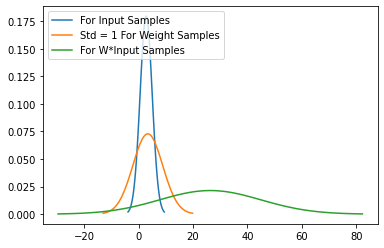

In [41]:
W1_a = np.random.normal(loc=0.0, scale=5, size=(3, 4)).astype(np.float32)
x = np.array(X_train.iloc[0:1, :], dtype=np.float32).reshape(1,4)


r = np.matmul(x, W1_a.T)
print("Weight = ", W1_a)
print("Weight * Input = ", r)
s1 = np.std(W1_a)
m1 = np.mean(W1_a)
print(f"Mean Before transformation = {np.mean(x)}, Mean after transformation = {np.mean(r)}")
s2 = np.std(r)
m2 = np.mean(r)
s3 = np.std(x)
m3 = np.mean(x)

x_a = np.linspace(m1-3*s1, m1+3*s1, 100)
x_b = np.linspace(m2-3*s2, m2+3*s2, 100)
x_i = np.linspace(m3-3*s3, m3+3*s3, 100)
x_n = np.linspace(0-3*1, 0+3*1, 100)
# plt.plot(x_a, norm.pdf(x_n, 0, 1), label = 'Normal Distribution Curve')
plt.plot(x_i, norm.pdf(x_i, m3, s3), label = 'For Input Samples')
plt.plot(x_a, norm.pdf(x_a, m1, s1), label = 'Std = 1 For Weight Samples')
plt.plot(x_b, norm.pdf(x_b, m2, s2), label = 'For W*Input Samples')
plt.legend(loc='upper left')
plt.show()

Weight =  [[-0.12532033  0.02113981  0.59764224 -0.4821258 ]
 [ 0.17719162 -0.41640145 -0.12185229  0.28116584]
 [ 0.01659703 -0.2782725  -0.18469062  0.17547138]]
Weight * Input =  [[-0.02155316 -0.727884   -1.2033617 ]]
Mean Before transformation = 2.799999952316284, Mean after transformation = -0.6509329676628113


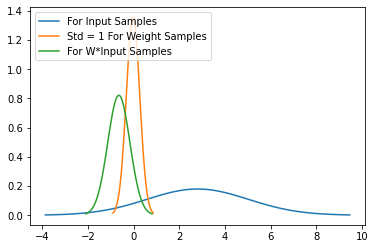

In [42]:
W1_a = np.random.normal(loc=0.0, scale=np.sqrt(2/30), size=(3, 4)).astype(np.float32)
x = np.array(X_train.iloc[0:1, :], dtype=np.float32).reshape(1,4)


r = np.matmul(x, W1_a.T)
print("Weight = ", W1_a)
print("Weight * Input = ", r)
s1 = np.std(W1_a)
m1 = np.mean(W1_a)
print(f"Mean Before transformation = {np.mean(x)}, Mean after transformation = {np.mean(r)}")
s2 = np.std(r)
m2 = np.mean(r)
s3 = np.std(x)
m3 = np.mean(x)

x_a = np.linspace(m1-3*s1, m1+3*s1, 100)
x_b = np.linspace(m2-3*s2, m2+3*s2, 100)
x_i = np.linspace(m3-3*s3, m3+3*s3, 100)
x_n = np.linspace(0-3*1, 0+3*1, 100)
# plt.plot(x_a, norm.pdf(x_n, 0, 1), label = 'Normal Distribution Curve')
plt.plot(x_i, norm.pdf(x_i, m3, s3), label = 'For Input Samples')
plt.plot(x_a, norm.pdf(x_a, m1, s1), label = 'Std = 1 For Weight Samples')
plt.plot(x_b, norm.pdf(x_b, m2, s2), label = 'For W*Input Samples')
plt.legend(loc='upper left')
plt.show()

Weight =  [[-0.5164472   0.15305933  0.03222416 -0.46075103]
 [ 1.5159974   0.44824845 -1.431992    0.1318431 ]
 [-0.4679537   0.6027614  -0.5603968  -0.08113091]]
Weight * Input =  [[-2.4366374  8.893757  -0.9917884]]
Mean Before transformation = 2.799999952316284, Mean after transformation = -0.6509329676628113


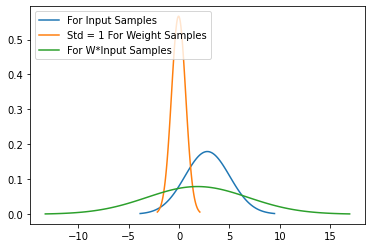

In [43]:
W1_a = np.random.normal(loc=0.0, scale=np.sqrt(0.5), size=(3, 4)).astype(np.float32)
x = np.array(X_train.iloc[0:1, :], dtype=np.float32).reshape(1,4)


r = np.matmul(x, W1_a.T)
print("Weight = ", W1_a)
print("Weight * Input = ", r)
s1 = np.std(W1_a)
m1 = np.mean(W1_a)
print(f"Mean Before transformation = {np.mean(x)}, Mean after transformation = {m2}")
s2 = np.std(r)
m2 = np.mean(r)
s3 = np.std(x)
m3 = np.mean(x)

x_a = np.linspace(m1-3*s1, m1+3*s1, 100)
x_b = np.linspace(m2-3*s2, m2+3*s2, 100)
x_i = np.linspace(m3-3*s3, m3+3*s3, 100)
x_n = np.linspace(0-3*1, 0+3*1, 100)
# plt.plot(x_a, norm.pdf(x_n, 0, 1), label = 'Normal Distribution Curve')
plt.plot(x_i, norm.pdf(x_i, m3, s3), label = 'For Input Samples')
plt.plot(x_a, norm.pdf(x_a, m1, s1), label = 'Std = 1 For Weight Samples')
plt.plot(x_b, norm.pdf(x_b, m2, s2), label = 'For W*Input Samples')
plt.legend(loc='upper left')
plt.show()